In [7]:
!pip install fastapi uvicorn langgraph openai

   ---------------------------------------- 0.0/94.8 kB ? eta -:--:--
   ------------------------- -------------- 61.4/94.8 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 94.8/94.8 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
   ---------------------------------------- 62.3/62.3 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/71.5 kB ? eta -:--:--
   ---------------------------------------- 71.5/71.5 kB 4.1 MB/s eta 0:00:00


In [43]:
from fastapi import FastAPI
from pydantic import BaseModel
# from langgraph import AgentGraph, Tool
from langgraph.graph import StateGraph
import openai

app = FastAPI()

# Define user input model
class UserRequest(BaseModel):
    user_input: str

# Define agent behavior (Example: LLM calling function)
def llm_agent(input_text):
    response = openai.ChatCompletion.create(
        model="gpt-4-turbo",
        messages=[{"role": "system", "content": "You are an AI assistant."},
                  {"role": "user", "content": input_text}]
    )
    return response["choices"][0]["message"]["content"]

@app.get("/process")
async def process_request(request: UserRequest):
    response = graph.invoke(request.user_input)
    # return {"response": response}
    return {"response": "Hello"}
    
@app.post("/process")
async def process_request(request: UserRequest):
    response = graph.invoke(request.user_input)
    return {"response": response}

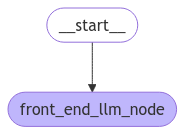

In [45]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    user_text: str
    

def front_end_llm_node() :
    print ("---front_end_llm_node---")
    return {"graph_state": state['user_text']}

# def front_end_llm_node() :
#     print ("---front_end_llm_node---")
#     return {"graph_state": state['user_text']}
    
    

# Define a sample agent graph
# graph = AgentGraph()
builder = StateGraph(State)
builder.add_node("front_end_llm_node", front_end_llm_node)
builder.add_edge(START, "front_end_llm_node")
# graph.add_node("assistant", assistant)
# builder.add_node("tools", ToolNode(tools))
# graph.add_tool(Tool(name="AI_Assistant", function=llm_agent))

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))